In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from gensim import corpora, models
from gensim.models import TfidfModel
import gensim
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import sys
import os

sys.path.append(os.path.join(os.path.dirname(os.path.dirname(os.path.realpath(sys.path[0]))),'src'))
from FeatureStore.data_picker import DataPicker

[nltk_data] Downloading package wordnet to /home/kishore/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/kishore/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kishore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/kishore/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [113]:
_dataPicker = DataPicker()
df_articles =  _dataPicker.process()
df_articles['index'] = df_articles.index
nullindex = df_articles[df_articles['content'].isnull()].index
df_articles.drop(index=nullindex,inplace=True)
__stop_words = set(stopwords.words('english'))
__wordnetLemmatizer = WordNetLemmatizer()
__stemmer = PorterStemmer()

DataPicker instantiated
extracting articles data from database
getting articles data
2353 articles retrieved
PostgreSQL connection is now closed


In [104]:
df_articles.head(200)

,article_id,content,index
0,1,WASHINGTON -- U.S. home construction rose a so...,0
1,2,ISLAMABAD -- Pakistan's army chief Tuesday ord...,1
2,3,BALTIMORE -- Some voters could ride in style t...,2
3,4,Our month of Halloween surprises continues wit...,3
4,5,UNITED NATIONS -- The European Union on Tuesda...,4
...,...,...,...
195,196,Benchmark U.S. crude oil for December delivery...,195
196,197,"KILLEEN, Texas -- The family of a Texas soldie...",196
197,198,All in-person learning for Boston Public Schoo...,197
198,199,"COPENHAGEN, Denmark -- A Danish man convicted ...",198


In [114]:
#remove stopwords, punctuations, stemming, lemmatization and get tokens
def __preprocess(line):
    result=[]
    tokens=[]
    line = re.sub(r'[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]','',line)
    line = line.strip()
    tokens = word_tokenize(line)
    tokens = list(map(lambda x : x.lower(),tokens))
    tokens = [x for x in tokens if x not in __stop_words]
    tokens = list(map(lambda x : __stemmer.stem(x),tokens))
    pos_tags = nltk.pos_tag(tokens)
    for token,postag in pos_tags:    
        pos = __getPosTagDef(postag)
        if pos != '':
          result.append(__wordnetLemmatizer.lemmatize(token,pos))
        else:
          result.append(__wordnetLemmatizer.lemmatize(token))
    return result

In [115]:
 def __getPosTagDef(postag):
    try:
      if postag.startswith('J'):
          return wordnet.ADJ
      if postag.startswith('V'):
          return wordnet.VERB
      if postag.startswith('N'):
          return wordnet.NOUN
      if postag.startswith('R'):
          return wordnet.ADV
      else:
          return ''
    except:
      print(sys.exc_info()[0])

In [123]:
df_articles['processed_content'] = df_articles['content'].map(__preprocess)

In [124]:
df_articles = df_articles[:10]

In [131]:
def __EDA():
    try:
      print('EDA by giving word cloud')
      _wordcloud = WordCloud()
      tokens = []
      lst = [[tokens.append(y) for y in x] for x in df_articles['processed_content']]
      longstring = ','.join(tokens)
      
      _wordcloud.generate(longstring)
      plt.imshow(_wordcloud)
      plt.axis('off')
      plt.show()
      
      id2word = gensim.corpora.Dictionary(df_articles['processed_content'])
      count=0;
      for key, val in id2word.iteritems():
            print(key,'-->', val)
            count +=1
            if count >= 10:
                break;
      print('show top 10 words by count')

      processeddata=df_articles['processed_content']
      gensim_bow = [id2word.doc2bow(text) for text in processeddata]
      print('gensim bag of words (wordid : wordcount) \n',gensim_bow[:10])
      gensim_tfidf = gensim.models.TfidfModel(gensim_bow)
      print('gensim Tfidf data (wordid : Tfidf value) \n')
      corpus_tfidf = gensim_tfidf[gensim_bow]
      for doc in corpus_tfidf[:10]:
            print(doc)
  
    except:
      print(sys.exc_info())

EDA by giving word cloud


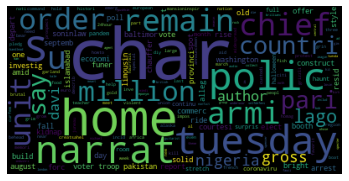

0 --> 19
1 --> 478
2 --> august
3 --> bright
4 --> build
5 --> char
6 --> commerc
7 --> construct
8 --> depart
9 --> economi
show top 10 words by count
gensim bag of words (wordid : wordcount) 
 [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(5, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)], [(5, 1), (11, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)], [(5, 1), (11, 1), (39, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1)], [(5, 1), (38, 1),

In [132]:
__EDA()